# ASSIGNMENT - MULTI LINEAR REGRESSION

# QUESTION 1

In [65]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy import stats

In [66]:
data = pd.read_csv('ToyotaCorolla (4).csv', encoding ='latin1')
data

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


In [67]:
data.shape

(1436, 38)

In [68]:
data.isnull().sum()

Id                  0
Model               0
Price               0
Age_08_04           0
Mfg_Month           0
Mfg_Year            0
KM                  0
Fuel_Type           0
HP                  0
Met_Color           0
Color               0
Automatic           0
cc                  0
Doors               0
Cylinders           0
Gears               0
Quarterly_Tax       0
Weight              0
Mfr_Guarantee       0
BOVAG_Guarantee     0
Guarantee_Period    0
ABS                 0
Airbag_1            0
Airbag_2            0
Airco               0
Automatic_airco     0
Boardcomputer       0
CD_Player           0
Central_Lock        0
Powered_Windows     0
Power_Steering      0
Radio               0
Mistlamps           0
Sport_Model         0
Backseat_Divider    0
Metallic_Rim        0
Radio_cassette      0
Tow_Bar             0
dtype: int64

In [69]:
data.dtypes

Id                   int64
Model               object
Price                int64
Age_08_04            int64
Mfg_Month            int64
Mfg_Year             int64
KM                   int64
Fuel_Type           object
HP                   int64
Met_Color            int64
Color               object
Automatic            int64
cc                   int64
Doors                int64
Cylinders            int64
Gears                int64
Quarterly_Tax        int64
Weight               int64
Mfr_Guarantee        int64
BOVAG_Guarantee      int64
Guarantee_Period     int64
ABS                  int64
Airbag_1             int64
Airbag_2             int64
Airco                int64
Automatic_airco      int64
Boardcomputer        int64
CD_Player            int64
Central_Lock         int64
Powered_Windows      int64
Power_Steering       int64
Radio                int64
Mistlamps            int64
Sport_Model          int64
Backseat_Divider     int64
Metallic_Rim         int64
Radio_cassette       int64
T

In [70]:
data.describe()

,Id,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,...,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000
mean,721.555014,10730.824513,55.947075,5.548747,1999.625348,68533.259749,101.502089,0.674791,0.055710,1576.85585,...,0.580084,0.561978,0.977716,0.146240,0.256964,0.300139,0.770195,0.204735,0.145543,0.277855
std,416.476890,3626.964585,18.599988,3.354085,1.540722,37506.448872,14.981080,0.468616,0.229441,424.38677,...,0.493717,0.496317,0.147657,0.353469,0.437111,0.458478,0.420854,0.403649,0.352770,0.448098
min,1.000000,4350.000000,1.000000,1.000000,1998.000000,1.000000,69.000000,0.000000,0.000000,1300.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,361.750000,8450.000000,44.000000,3.000000,1998.000000,43000.000000,90.000000,0.000000,0.000000,1400.00000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,721.500000,9900.000000,61.000000,5.000000,1999.000000,63389.500000,110.000000,1.000000,0.000000,1600.00000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1081.250000,11950.000000,70.000000,8.000000,2001.000000,87020.750000,110.000000,1.000000,0.000000,1600.00000,...,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1442.000000,32500.000000,80.000000,12.000000,2004.000000,243000.000000,192.000000,1.000000,1.000000,16000.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [71]:
data_cars = data[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]
data_cars

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


## assumptions check

### 1. Normality test

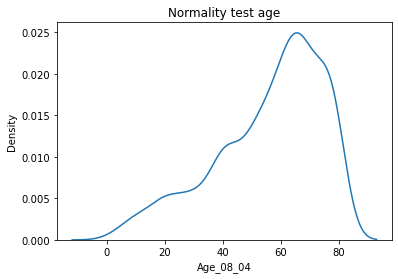

In [72]:
sns.distplot(a=data_cars['Age_08_04'],hist=False )
plt.title("Normality test age")
plt.show()

In [73]:
data_cars['Age_08_04'].skew()

-0.82670187309842

In [74]:
data_cars['Age_08_04'].kurtosis()

-0.0766324777459908

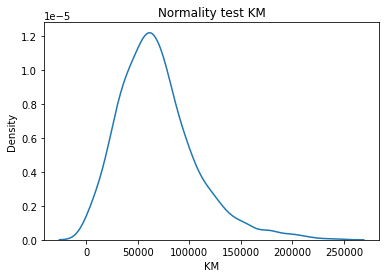

In [75]:
sns.distplot(a=data_cars['KM'],hist=False )
plt.title('Normality test KM')
plt.show()

In [76]:
data_cars['KM'].skew()

1.0159121980877577

In [77]:
data_cars['KM'].kurtosis()

1.6850567186709635

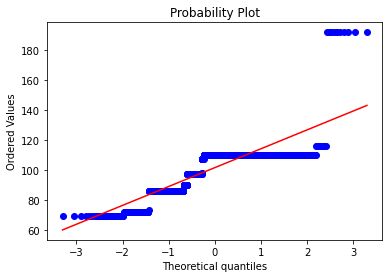

In [78]:
stats.probplot(x = data_cars['HP'], dist='norm', plot=plt)
plt.show()

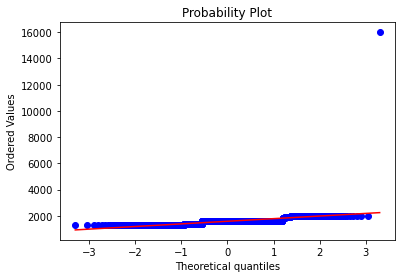

In [79]:
stats.probplot(x=data_cars['cc'],dist='norm', plot=plt)
plt.show()

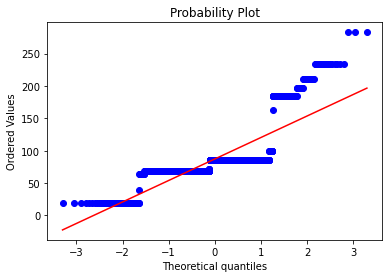

In [80]:
stats.probplot(x=data_cars['Quarterly_Tax'], dist='norm', plot=plt)
plt.show()

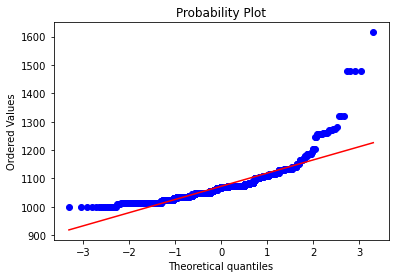

In [81]:
stats.probplot(x=data_cars['Weight'],dist='norm', plot=plt)
plt.show()

#### normality test failed

### 2. Linearity test

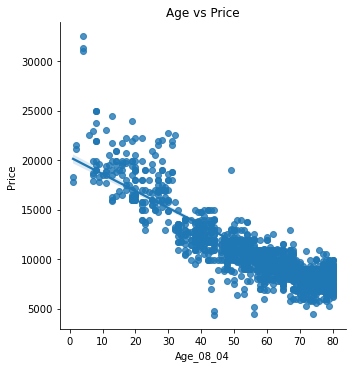

In [82]:
sns.lmplot(x='Age_08_04', y='Price', data= data_cars)
plt.title('Age vs Price')
plt.show()

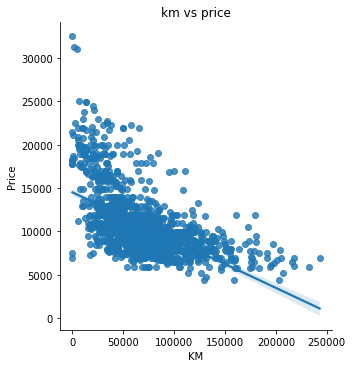

In [83]:
sns.lmplot(x='KM', y='Price', data= data_cars)
plt.title('km vs price')
plt.show()

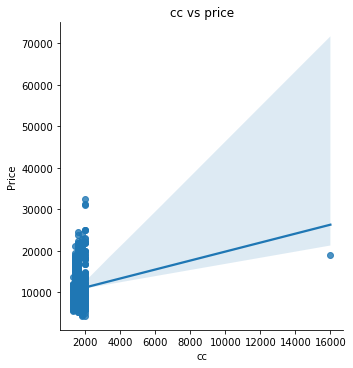

In [84]:
sns.lmplot(x='cc', y='Price', data=data_cars)
plt.title('cc vs price')
plt.show()

#### linearity test failed

## 3. multi collinearity test
collinearity matrix

In [85]:
data_cars_corr_matrix = data_cars.corr().round(2)
data_cars_corr_matrix

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.00,-0.88,-0.57,0.31,0.13,0.19,0.06,0.22,0.58
Age_08_04,-0.88,1.00,0.51,-0.16,-0.10,-0.15,-0.01,-0.20,-0.47
KM,-0.57,0.51,1.00,-0.33,0.10,-0.04,0.02,0.28,-0.03
HP,0.31,-0.16,-0.33,1.00,0.04,0.09,0.21,-0.30,0.09
cc,0.13,-0.10,0.10,0.04,1.00,0.08,0.01,0.31,0.34
Doors,0.19,-0.15,-0.04,0.09,0.08,1.00,-0.16,0.11,0.30
Gears,0.06,-0.01,0.02,0.21,0.01,-0.16,1.00,-0.01,0.02
Quarterly_Tax,0.22,-0.20,0.28,-0.30,0.31,0.11,-0.01,1.00,0.63
Weight,0.58,-0.47,-0.03,0.09,0.34,0.30,0.02,0.63,1.00


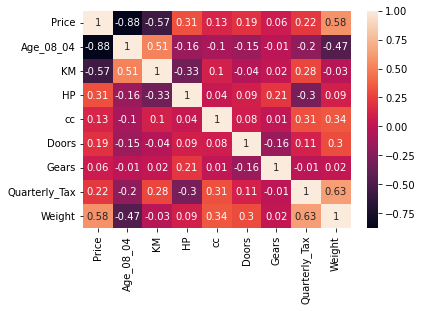

In [86]:
sns.heatmap(data_cars_corr_matrix, annot = True)
plt.show()

#### multicollinearity problem does not exist

### 4. auto regression test - no time based input

In [87]:
data_cars

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


## model building using sklearn

In [88]:
x = data_cars.drop(['Price'],axis=1)
y= data_cars['Price']

In [89]:
x.columns

Index(['Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Gears', 'Quarterly_Tax',
       'Weight'],
      dtype='object')

In [90]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
x_scaled = std_scaler.fit_transform(x)
x_scaled=pd.DataFrame(data=x_scaled, columns=x.columns)
x_scaled

,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,-1.771966,-0.574695,-0.768042,0.997419,-1.085139,-0.140425,2.988680,1.758561
1,-1.771966,0.117454,-0.768042,0.997419,-1.085139,-0.140425,2.988680,1.758561
2,-1.718184,-0.715386,-0.768042,0.997419,-1.085139,-0.140425,2.988680,1.758561
3,-1.610620,-0.547650,-0.768042,0.997419,-1.085139,-0.140425,2.988680,1.758561
4,-1.395491,-0.801028,-0.768042,0.997419,-1.085139,-0.140425,2.988680,1.853577
...,...,...,...,...,...,...,...,...
1431,0.702015,-1.279939,-1.035138,-0.652594,-1.085139,-0.140425,-0.440785,-0.901883
1432,0.863362,-1.321120,-1.035138,-0.652594,-1.085139,-0.140425,-0.440785,-1.091915
1433,0.809579,-1.374036,-1.035138,-0.652594,-1.085139,-0.140425,-0.440785,-1.091915
1434,0.755797,-1.376703,-1.035138,-0.652594,-1.085139,-0.140425,-0.440785,-1.091915


In [91]:
x_scaled.mean()

Age_08_04       -2.536349e-15
KM               3.064710e-16
HP               7.216450e-16
cc               1.263628e-15
Doors           -2.610106e-16
Gears            2.557147e-16
Quarterly_Tax   -5.575855e-16
Weight          -2.491353e-15
dtype: float64

In [92]:
x_scaled.std()

Age_08_04        1.000348
KM               1.000348
HP               1.000348
cc               1.000348
Doors            1.000348
Gears            1.000348
Quarterly_Tax    1.000348
Weight           1.000348
dtype: float64

## model training

In [93]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression
linear_model = LinearRegression()
linear_model.fit(x_scaled,y)

LinearRegression()

In [94]:
linear_model.coef_

array([-2.26205682e+03, -7.80504686e+02,  4.74448890e+02, -5.13754677e+01,
       -1.53959966e+00,  1.11996499e+02,  1.62363645e+02,  8.92410492e+02])

In [95]:
linear_model.intercept_

10730.824512534818

## model testing

In [96]:
y_pred = linear_model.predict(x_scaled)

## model evaluation

In [97]:
error = y-y_pred
error

0      -3312.580505
1      -2522.355186
2      -2850.732460
3      -1476.496731
4      -2472.419010
           ...     
1431   -1293.758297
1432    2553.661579
1433      45.701993
1434   -1328.038121
1435   -3452.438333
Name: Price, Length: 1436, dtype: float64

## 5. homoscedasticity check

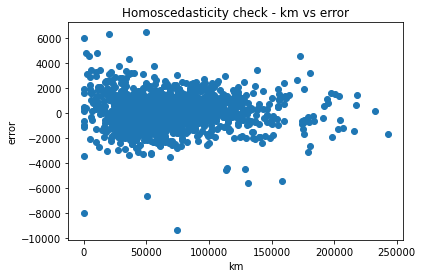

In [98]:
plt.scatter(x=data_cars['KM'], y=error)
plt.title('Homoscedasticity check - km vs error')
plt.xlabel('km')
plt.ylabel('error')
plt.show()

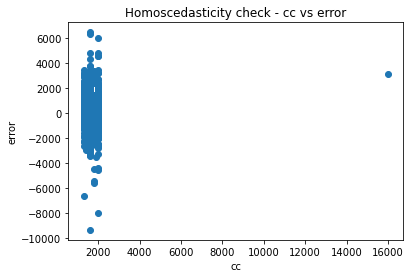

In [99]:
plt.scatter(x=data_cars['cc'],y=error)
plt.title('Homoscedasticity check - cc vs error')
plt.xlabel('cc')
plt.ylabel('error')
plt.show()

### homoscedasticity test failed

## 5. zero residual mean test

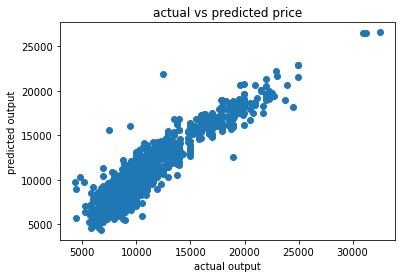

In [100]:
plt.scatter(x=y, y=y_pred)
plt.title('actual vs predicted price')
plt.xlabel('actual output')
plt.ylabel('predicted output')
plt.show()

#### zero residual mean test also failed

## model optimization techniques

In [101]:
data_cars

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


### model building using statsmodel

In [103]:
import statsmodels.formula.api as smf

In [104]:
model = smf.ols(formula='Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight', data = data_cars).fit()

In [105]:
model.params

Intercept       -5573.106358
Age_08_04        -121.658402
KM                 -0.020817
HP                 31.680906
cc                 -0.121100
Doors              -1.616641
Gears             594.319936
Quarterly_Tax       3.949081
Weight             16.958632
dtype: float64

In [106]:
model.pvalues

Intercept         8.241949e-05
Age_08_04        3.354724e-288
KM                7.538439e-57
HP                3.757218e-28
cc                1.790902e-01
Doors             9.677716e-01
Gears             2.606549e-03
Quarterly_Tax     2.619148e-03
Weight            2.048576e-52
dtype: float64

#### hypothesis statement

**H0 = this feature is not significant for prediction**

**Ha = this feature is significant for prediction**

**5% los**

In [107]:
model_1 = smf.ols(formula='Price~Age_08_04', data = data_cars).fit()
print('R-square                           : ',round(model_1.rsquared,4))
print('Adjusted R-square                  : ',round(model_1.rsquared_adj,4))
print('Akaike information criterion (AIC) : ',round(model_1.aic,4))
print('Bayesian information criterion(BIC): ',round(model_1.bic,4))

R-square                           :  0.7684
Adjusted R-square                  :  0.7682
Akaike information criterion (AIC) :  25516.9706
Bayesian information criterion(BIC):  25527.5098


In [108]:
model_2 = smf.ols(formula='Price~Age_08_04+KM', data = data_cars).fit()
print('R-square                           : ',round(model_2.rsquared,4))
print('Adjusted R-square                  : ',round(model_2.rsquared_adj,4))
print('Akaike information criterion (AIC) : ',round(model_2.aic,4))
print('Bayesian information criterion(BIC): ',round(model_2.bic,4))

R-square                           :  0.79
Adjusted R-square                  :  0.7897
Akaike information criterion (AIC) :  25378.6096
Bayesian information criterion(BIC):  25394.4185


In [109]:
model_3 = smf.ols(formula='Price~Age_08_04+KM+HP', data = data_cars).fit()
print('R-square                           : ',round(model_3.rsquared,4))
print('Adjusted R-square                  : ',round(model_3.rsquared_adj,4))
print('Akaike information criterion (AIC) : ',round(model_3.aic,4))
print('Bayesian information criterion(BIC): ',round(model_3.bic,4))

R-square                           :  0.8103
Adjusted R-square                  :  0.8099
Akaike information criterion (AIC) :  25234.4118
Bayesian information criterion(BIC):  25255.4902


In [110]:
model_4 = smf.ols(formula='Price~Age_08_04+KM+HP+cc', data = data_cars).fit()
print('R-square                           : ',round(model_4.rsquared,4))
print('Adjusted R-square                  : ',round(model_4.rsquared_adj,4))
print('Akaike information criterion (AIC) : ',round(model_4.aic,4))
print('Bayesian information criterion(BIC): ',round(model_4.bic,4))

R-square                           :  0.8135
Adjusted R-square                  :  0.813
Akaike information criterion (AIC) :  25211.8665
Bayesian information criterion(BIC):  25238.2146


In [111]:
model_5 = smf.ols(formula='Price~Age_08_04+KM+HP+cc+Doors', data = data_cars).fit()
print('R-square                           : ',round(model_5.rsquared,4))
print('Adjusted R-square                  : ',round(model_5.rsquared_adj,4))
print('Akaike information criterion (AIC) : ',round(model_5.aic,4))
print('Bayesian information criterion(BIC): ',round(model_5.bic,4))

R-square                           :  0.8158
Adjusted R-square                  :  0.8151
Akaike information criterion (AIC) :  25196.5421
Bayesian information criterion(BIC):  25228.1598


In [112]:
model_6 = smf.ols(formula='Price~Age_08_04+KM+HP+cc+Doors+Gears', data = data_cars).fit()
print('R-square                           : ',round(model_6.rsquared,4))
print('Adjusted R-square                  : ',round(model_6.rsquared_adj,4))
print('Akaike information criterion (AIC) : ',round(model_6.aic,4))
print('Bayesian information criterion(BIC): ',round(model_6.bic,4))

R-square                           :  0.8173
Adjusted R-square                  :  0.8166
Akaike information criterion (AIC) :  25186.1133
Bayesian information criterion(BIC):  25223.0007


In [113]:
model_7 = smf.ols(formula='Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax', data = data_cars).fit()
print('R-square                           : ',round(model_7.rsquared,4))
print('Adjusted R-square                  : ',round(model_7.rsquared_adj,4))
print('Akaike information criterion (AIC) : ',round(model_7.aic,4))
print('Bayesian information criterion(BIC): ',round(model_7.bic,4))

R-square                           :  0.8397
Adjusted R-square                  :  0.8389
Akaike information criterion (AIC) :  25000.7486
Bayesian information criterion(BIC):  25042.9055


In [114]:
model_8 = smf.ols(formula='Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight', data = data_cars).fit()
print('R-square                           : ',round(model_8.rsquared,4))
print('Adjusted R-square                  : ',round(model_8.rsquared_adj,4))
print('Akaike information criterion (AIC) : ',round(model_8.aic,4))
print('Bayesian information criterion(BIC): ',round(model_8.bic,4))

R-square                           :  0.8638
Adjusted R-square                  :  0.863
Akaike information criterion (AIC) :  24769.0766
Bayesian information criterion(BIC):  24816.5032


### model_8 is the best model

# model optimization technique

### applying log transformation

In [142]:
import numpy as np
X_inputs= data_cars.copy()
X_inputs

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [143]:
X_inputs['log_Age_08_04']  = np.log(X_inputs['Age_08_04'])
X_inputs['log_KM']  = np.log(X_inputs['KM'])
X_inputs['log_HP'] = np.log(X_inputs['HP'])
X_inputs['log_cc']  = np.log(X_inputs['cc'])
X_inputs['log_Doors']  = np.log(X_inputs['Doors'])
X_inputs['log_Gears']  = np.log(X_inputs['Gears'])
X_inputs['log_Quarterly_Tax'] = np.log(X_inputs['Quarterly_Tax'])
X_inputs['log_Weight']  = np.log(X_inputs['Weight'])
X_inputs

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight,log_Age_08_04,log_KM,log_HP,log_cc,log_Doors,log_Gears,log_Quarterly_Tax,log_Weight
0,13500,23,46986,90,2000,3,5,210,1165,3.135494,10.757605,4.499810,7.600902,1.098612,1.609438,5.347108,7.060476
1,13750,23,72937,90,2000,3,5,210,1165,3.135494,11.197351,4.499810,7.600902,1.098612,1.609438,5.347108,7.060476
2,13950,24,41711,90,2000,3,5,210,1165,3.178054,10.638520,4.499810,7.600902,1.098612,1.609438,5.347108,7.060476
3,14950,26,48000,90,2000,3,5,210,1165,3.258097,10.778956,4.499810,7.600902,1.098612,1.609438,5.347108,7.060476
4,13750,30,38500,90,2000,3,5,210,1170,3.401197,10.558414,4.499810,7.600902,1.098612,1.609438,5.347108,7.064759
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025,4.234107,9.930324,4.454347,7.170120,1.098612,1.609438,4.234107,6.932448
1432,10845,72,19000,86,1300,3,5,69,1015,4.276666,9.852194,4.454347,7.170120,1.098612,1.609438,4.234107,6.922644
1433,8500,71,17016,86,1300,3,5,69,1015,4.262680,9.741909,4.454347,7.170120,1.098612,1.609438,4.234107,6.922644
1434,7250,70,16916,86,1300,3,5,69,1015,4.248495,9.736015,4.454347,7.170120,1.098612,1.609438,4.234107,6.922644


## model building using statsmodel

In [139]:
model2 = smf.ols(formula = 'Price~log_KM', data = X_inputs).fit()
print('R-square                           : ',round(model2.rsquared,4))
print('Adjusted R-square                  : ',round(model2.rsquared_adj,4))
print('Akaike information criterion (AIC) : ',round(model2.aic,4))
print('Bayesian information criterion(BIC): ',round(model2.bic,4))

R-square                           :  0.2699
Adjusted R-square                  :  0.2694
Akaike information criterion (AIC) :  27165.7436
Bayesian information criterion(BIC):  27176.2828


In [126]:
model3 = smf.ols(formula = 'Price~log_KM+log_HP', data = X_inputs).fit()
print('R-square                           : ',round(model3.rsquared,4))
print('Adjusted R-square                  : ',round(model3.rsquared_adj,4))
print('Akaike information criterion (AIC) : ',round(model3.aic,4))
print('Bayesian information criterion(BIC): ',round(model3.bic,4))

R-square                           :  0.3108
Adjusted R-square                  :  0.3099
Akaike information criterion (AIC) :  27084.9308
Bayesian information criterion(BIC):  27100.7397


In [125]:
model4 = smf.ols(formula = 'Price~log_KM+log_HP+log_cc', data = X_inputs).fit()
print('R-square                           : ',round(model4.rsquared,4))
print('Adjusted R-square                  : ',round(model4.rsquared_adj,4))
print('Akaike information criterion (AIC) : ',round(model4.aic,4))
print('Bayesian information criterion(BIC): ',round(model4.bic,4))

R-square                           :  0.3502
Adjusted R-square                  :  0.3488
Akaike information criterion (AIC) :  27002.5474
Bayesian information criterion(BIC):  27023.6259


In [124]:
model5 = smf.ols(formula = 'Price~log_KM+log_HP+log_cc+log_Doors', data = X_inputs).fit()
print('R-square                           : ',round(model5.rsquared,4))
print('Adjusted R-square                  : ',round(model5.rsquared_adj,4))
print('Akaike information criterion (AIC) : ',round(model5.aic,4))
print('Bayesian information criterion(BIC): ',round(model5.bic,4))

R-square                           :  0.3612
Adjusted R-square                  :  0.3594
Akaike information criterion (AIC) :  26980.0096
Bayesian information criterion(BIC):  27006.3577


In [123]:
model6 = smf.ols(formula = 'Price~log_KM+log_HP+log_cc+log_Doors+log_Gears', data = X_inputs).fit()
print('R-square                           : ',round(model6.rsquared,4))
print('Adjusted R-square                  : ',round(model6.rsquared_adj,4))
print('Akaike information criterion (AIC) : ',round(model6.aic,4))
print('Bayesian information criterion(BIC): ',round(model6.bic,4))

R-square                           :  0.3642
Adjusted R-square                  :  0.362
Akaike information criterion (AIC) :  26975.2387
Bayesian information criterion(BIC):  27006.8564


In [122]:
model7 = smf.ols(formula = 'Price~log_KM+log_HP+log_cc+log_Doors+log_Gears+log_Quarterly_Tax', data = X_inputs).fit()
print('R-square                           : ',round(model7.rsquared,4))
print('Adjusted R-square                  : ',round(model7.rsquared_adj,4))
print('Akaike information criterion (AIC) : ',round(model7.aic,4))
print('Bayesian information criterion(BIC): ',round(model7.bic,4))

R-square                           :  0.417
Adjusted R-square                  :  0.4145
Akaike information criterion (AIC) :  26852.7944
Bayesian information criterion(BIC):  26889.6817


In [141]:
model8 = smf.ols(formula = 'Price~log_KM+log_HP+log_cc+log_Doors+log_Gears+log_Quarterly_Tax+log_Weight', data = X_inputs).fit()
print('R-square                           : ',round(model8.rsquared,4))
print('Adjusted R-square                  : ',round(model8.rsquared_adj,4))
print('Akaike information criterion (AIC) : ',round(model8.aic,4))
print('Bayesian information criterion(BIC): ',round(model8.bic,4))

R-square                           :  0.5858
Adjusted R-square                  :  0.5837
Akaike information criterion (AIC) :  26363.9625
Bayesian information criterion(BIC):  26406.1194


## model8 is the best fit

# =============================================================

# QUESTION 2

#### Prepare a prediction model for profit of 50_startups data.
Do transformations for getting better predictions of profit and
make a table containing R^2 value for each prepared model.


In [170]:
startup = pd.read_csv('50_Startups (1).csv')
startup.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [171]:
startup.shape

(50, 5)

In [172]:
startup.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [173]:
startup.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

In [174]:
startup.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


### assumptions check
#### 1. normality test

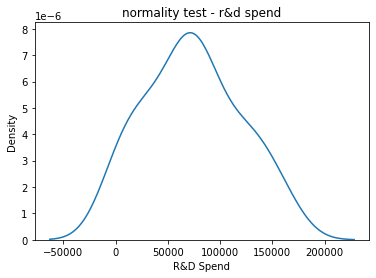

In [175]:
sns.distplot(a=startup['R&D Spend'], hist=False)
plt.title('normality test - r&d spend')
plt.show()

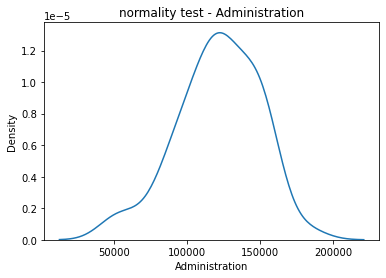

In [176]:
sns.distplot(a=startup['Administration'], hist=False)
plt.title('normality test - Administration')
plt.show()

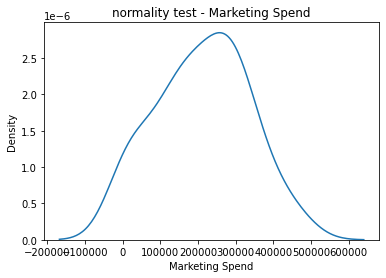

In [177]:
sns.distplot(a=startup['Marketing Spend'], hist=False)
plt.title('normality test - Marketing Spend')
plt.show()

### 2. linearity test

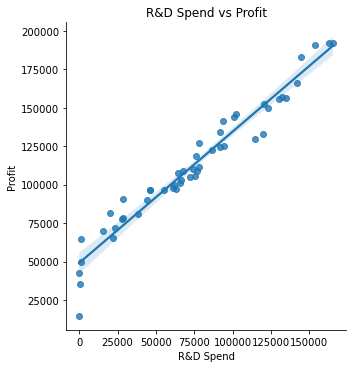

In [178]:
sns.lmplot(x='R&D Spend', y='Profit', data= startup)
plt.title('R&D Spend vs Profit')
plt.show()

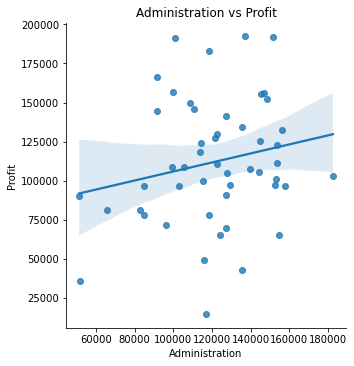

In [179]:
sns.lmplot(x='Administration', y='Profit', data= startup)
plt.title('Administration vs Profit')
plt.show()

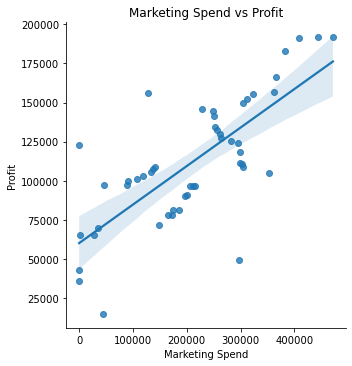

In [180]:
sns.lmplot(x='Marketing Spend', y='Profit', data= startup)
plt.title('Marketing Spend vs Profit')
plt.show()

##### linearity test fails

### 3. multi collinearity test (correlation matrix)

In [181]:
startup_corr_matrix = startup.corr().round(2)
startup_corr_matrix

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.00,0.24,0.72,0.97
Administration,0.24,1.00,-0.03,0.20
Marketing Spend,0.72,-0.03,1.00,0.75
Profit,0.97,0.20,0.75,1.00


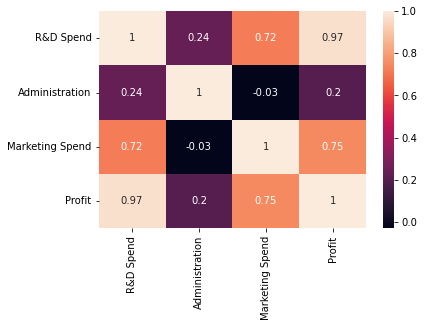

In [182]:
sns.heatmap(startup_corr_matrix, annot = True)
plt.show()

##### multi collinearity problem exists

### auto regression test - no time based input

## model building (using sklearn)

In [190]:
x = startup.drop(['Profit'],axis = 1)
y = startup[['Profit']]

In [191]:
x.shape, y.shape

((50, 4), (50, 1))

In [194]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,shuffle=True,random_state=None)

In [195]:
x_train.shape,y_train.shape

((40, 4), (40, 1))

In [214]:
x_train.head()

,R&D Spend,Administration,Marketing Spend
43,15505.73,127382.30,35534.17
31,61136.38,152701.92,88218.23
26,75328.87,144135.98,134050.07
48,542.05,51743.15,0.00
16,78013.11,121597.55,264346.06


In [241]:
x_train.drop('State', axis=1, inplace=True)
x_train

KeyError: "['State'] not found in axis"

In [222]:
x_test.drop('State', axis=1, inplace=True)
x_test

,R&D Spend,Administration,Marketing Spend
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
1,162597.70,151377.59,443898.53
34,46426.07,157693.92,210797.67
5,131876.90,99814.71,362861.36
37,44069.95,51283.14,197029.42
32,63408.86,129219.61,46085.25
49,0.00,116983.80,45173.06
11,100671.96,91790.61,249744.55
24,77044.01,99281.34,140574.81


In [215]:
x_train

,R&D Spend,Administration,Marketing Spend
43,15505.73,127382.30,35534.17
31,61136.38,152701.92,88218.23
26,75328.87,144135.98,134050.07
48,542.05,51743.15,0.00
16,78013.11,121597.55,264346.06
44,22177.74,154806.14,28334.72
38,20229.59,65947.93,185265.10
45,1000.23,124153.04,1903.93
29,65605.48,153032.06,107138.38
47,0.00,135426.92,0.00


In [212]:
y_train

,Profit
43,69758.98
31,97483.56
26,105733.54
48,35673.41
16,126992.93
44,65200.33
38,81229.06
45,64926.08
29,101004.64
47,42559.73


In [198]:
x_test.shape,y_test.shape

((10, 4), (10, 1))

### model training

In [216]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(x_train,y_train)

LinearRegression()

## model testing

In [219]:
y_pred_train = linear_model.predict(x_train)
from sklearn.metrics import mean_absolute_error,mean_squared_error
mean_squared_error(y_train,y_pred_train)

55060077.08748011

In [220]:
mean_absolute_error(y_train,y_pred_train)

5744.790046095307

In [223]:
y_pred_test = linear_model.predict(x_test)

In [224]:
mean_squared_error(y_test,y_pred_test)

204740725.03541976

In [225]:
mean_absolute_error(y_test,y_pred_test)

10105.664064385663